Introduction:
Predicting Health Insurance Cost is most important to make the policies more efficient, which can done by analysing certain features like cost control,risk management, fraud detection,resource allocation, customer satisfaction and healthcare planning.Majority countries finalise health insurance cost based on many factors age, number of members in a family etc.Some factors have been shown higher insurance price such as age, smoking status, preexisting disease etc.Researchers are still exploring more features to help insurance company to  to predict insurance price with much more accuracy.

AIM:
The aim of the project is to explore indepth to identify important features relevant to health insurance price as well as to deploy best ML model to help company to increase the accuracy of health insurance prediction.

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel("/content/Health_insurance_cost.xlsx")

In [ ]:
df.head()

age  gender     BMI  Children smoking_status   location  \
0  19.0  female     NaN         0            yes  southwest   
1  18.0    male  33.770         1             no  southeast   
2  28.0    male  33.000         3             no  southeast   
3  33.0    male  22.705         0             no  northwest   
4  32.0    male  28.880         0             no  northwest   

   health_insurance_price  
0             16884.92400  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520

In [ ]:
# creating multiple copies of the dataset to not to disturb the original dataset so that it can be used whenever it is required
df1=df.copy()
df=df.copy()

In [ ]:
# Checking the number of rows and columns in the dataset
df.shape

(1338, 7)

The dataset contains 1338 rows and 7 columns

In [ ]:
# To check the column names and datatype of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
# checking the statistical values of the numerical column in the dataset
df.describe(include="all")

age gender          BMI     Children smoking_status  \
count   1310.000000   1338  1315.000000  1338.000000           1338   
unique          NaN      2          NaN          NaN              2   
top             NaN   male          NaN          NaN             no   
freq            NaN    676          NaN          NaN           1064   
mean      39.166412    NaN    30.638217     1.094918            NaN   
std       14.055378    NaN     6.110302     1.205493            NaN   
min       18.000000    NaN    15.960000     0.000000            NaN   
25%       26.000000    NaN    26.210000     0.000000            NaN   
50%       39.000000    NaN    30.305000     1.000000            NaN   
75%       51.000000    NaN    34.580000     2.000000            NaN   
max       64.000000    NaN    53.130000     5.000000            NaN   

         location  health_insurance_price  
count        1338             1336.000000  
unique          4                     NaN  
top     southeast                     NaN  
freq          364                     NaN  
mean          NaN            13268.527719  
std           NaN            12112.797724  
min           NaN             1121.873900  
25%           NaN             4744.325050  
50%           NaN             9382.033000  
75%           NaN            16604.302645  
max           NaN            63770.428010

In [ ]:
# Finding the number of null values in each column
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [ ]:
#calulating the percentage of the missing values
df.isnull().mean()*100

age                       2.092676
gender                    0.000000
BMI                       1.718984
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149477
dtype: float64

In [ ]:
# Importing the required library to evaluate the missing value
import missingno as msno

<Axes: >

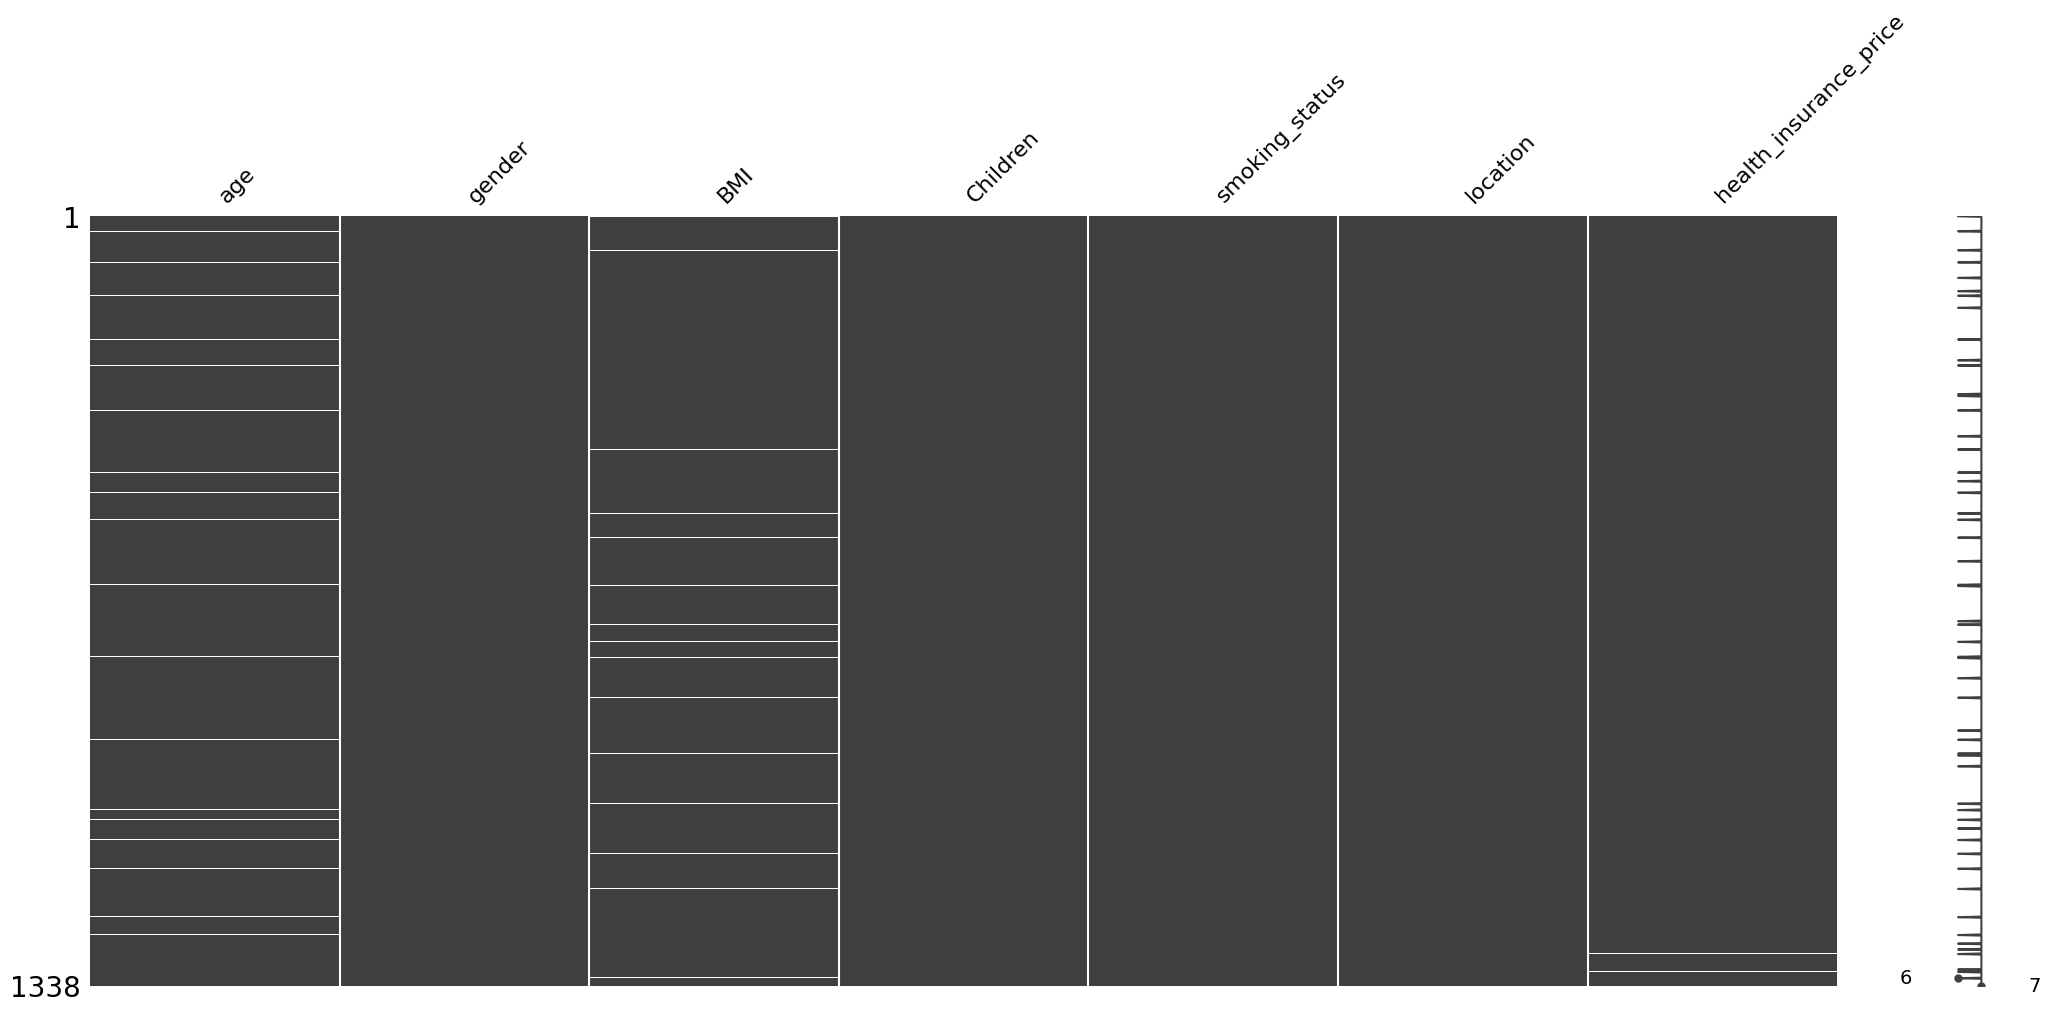

In [ ]:
#creating the matrix plot to check the pattern in the missing values
msno.matrix(df)

From the matrix it is obeserved that there is no corelation between the missing values.


In [ ]:
# Checking the unique values in smoking_status column
df.smoking_status.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df.location.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df.gender.unique()

array(['female', 'male'], dtype=object)

Applying encoding techniques before imputing the missing values


In [ ]:
df.head()

age  gender     BMI  Children smoking_status   location  \
0  19.0  female     NaN         0            yes  southwest   
1  18.0    male  33.770         1             no  southeast   
2  28.0    male  33.000         3             no  southeast   
3  33.0    male  22.705         0             no  northwest   
4  32.0    male  28.880         0             no  northwest   

   health_insurance_price  
0             16884.92400  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520

In [ ]:
df_en=pd.get_dummies(df,columns=['gender','smoking_status','location'])

In [ ]:
df_en = pd.get_dummies(df[['gender','smoking_status','location']], dummy_na=True)


In [ ]:
df_en.head(5)

gender_female  gender_male  gender_nan  smoking_status_no  \
0           True        False       False              False   
1          False         True       False               True   
2          False         True       False               True   
3          False         True       False               True   
4          False         True       False               True   

   smoking_status_yes  smoking_status_nan  location_northeast  \
0                True               False               False   
1               False               False               False   
2               False               False               False   
3               False               False               False   
4               False               False               False   

   location_northwest  location_southeast  location_southwest  location_nan  
0               False               False                True         False  
1               False                True               False         False  
2               False                True               False         False  
3                True               False               False         False  
4                True               False               False         False

In [ ]:
df_en = df_en.astype(int)
df_en.head()

gender_female  gender_male  gender_nan  smoking_status_no  \
0              1            0           0                  0   
1              0            1           0                  1   
2              0            1           0                  1   
3              0            1           0                  1   
4              0            1           0                  1   

   smoking_status_yes  smoking_status_nan  location_northeast  \
0                   1                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   location_northwest  location_southeast  location_southwest  location_nan  
0                   0                   0                   1             0  
1                   0                   1                   0             0  
2                   0                   1                   0             0  
3                   1                   0                   0             0  
4                   1                   0                   0             0

In [ ]:
df_final = pd.concat([df, df_en], axis=1)


In [ ]:
df_final.head()

age  gender     BMI  Children smoking_status   location  \
0  19.0  female     NaN         0            yes  southwest   
1  18.0    male  33.770         1             no  southeast   
2  28.0    male  33.000         3             no  southeast   
3  33.0    male  22.705         0             no  northwest   
4  32.0    male  28.880         0             no  northwest   

   health_insurance_price  gender_female  gender_male  gender_nan  \
0             16884.92400              1            0           0   
1              1725.55230              0            1           0   
2              4449.46200              0            1           0   
3             21984.47061              0            1           0   
4              3866.85520              0            1           0   

   smoking_status_no  smoking_status_yes  smoking_status_nan  \
0                  0                   1                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  1                   0                   0   
4                  1                   0                   0   

   location_northeast  location_northwest  location_southeast  \
0                   0                   0                   0   
1                   0                   0                   1   
2                   0                   0                   1   
3                   0                   1                   0   
4                   0                   1                   0   

   location_southwest  location_nan  
0                   1             0  
1                   0             0  
2                   0             0  
3                   0             0  
4                   0             0

In [ ]:
df_final.drop(['gender', 'smoking_status', 'location'], axis=1, inplace=True)


KeyError: "['gender', 'smoking_status', 'location'] not found in axis"

In [ ]:
df_final.head()

age     BMI  Children  health_insurance_price  gender_female  gender_male  \
0  19.0     NaN         0             16884.92400              1            0   
1  18.0  33.770         1              1725.55230              0            1   
2  28.0  33.000         3              4449.46200              0            1   
3  33.0  22.705         0             21984.47061              0            1   
4  32.0  28.880         0              3866.85520              0            1   

   gender_nan  smoking_status_no  smoking_status_yes  smoking_status_nan  \
0           0                  0                   1                   0   
1           0                  1                   0                   0   
2           0                  1                   0                   0   
3           0                  1                   0                   0   
4           0                  1                   0                   0   

   location_northeast  location_northwest  location_southeast  \
0                   0                   0                   0   
1                   0                   0                   1   
2                   0                   0                   1   
3                   0                   1                   0   
4                   0                   1                   0   

   location_southwest  location_nan  
0                   1             0  
1                   0             0  
2                   0             0  
3                   0             0  
4                   0             0

In [ ]:
df_final=df_final.copy()

In [ ]:
# Dealing with missing value
# importing the required library
from sklearn.impute import SimpleImputer
df_mean=df_final.copy(deep=True)# creating copy for further evaluation
mean_imputer=SimpleImputer(strategy='mean')


In [ ]:
df_mean.iloc[:,:]=mean_imputer.fit_transform(df_mean)


In [ ]:
df_mean.head()

age        BMI  Children  health_insurance_price  gender_female  \
0  19.0  30.638217         0             16884.92400              1   
1  18.0  33.770000         1              1725.55230              0   
2  28.0  33.000000         3              4449.46200              0   
3  33.0  22.705000         0             21984.47061              0   
4  32.0  28.880000         0              3866.85520              0   

   gender_male  gender_nan  smoking_status_no  smoking_status_yes  \
0            0           0                  0                   1   
1            1           0                  1                   0   
2            1           0                  1                   0   
3            1           0                  1                   0   
4            1           0                  1                   0   

   smoking_status_nan  location_northeast  location_northwest  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   1   
4                   0                   0                   1   

   location_southeast  location_southwest  location_nan  
0                   0                   1             0  
1                   1                   0             0  
2                   1                   0             0  
3                   0                   0             0  
4                   0                   0             0

In [ ]:
# Checking other imputation techniques to find the perfect value which perform better


In [ ]:
from sklearn.impute import SimpleImputer
df_median=df_final.copy(deep=True)# creating copy for further evaluation
median_imputer=SimpleImputer(strategy='median')
df_median.iloc[:,:]=mean_imputer.fit_transform(df_mean)



In [ ]:
df_mode = df_final.copy(deep=True) # creating a copy for further evaluation
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode.iloc[:, :] = mode_imputer.fit_transform(df_mode)

In [ ]:
#constant Imputaion
df_constant = df_final.copy(deep=True) # creating a copy for further evaluation
constant_imputer = SimpleImputer(strategy='constant', fill_value = 0)
df_constant.iloc[:, :] = constant_imputer.fit_transform(df_constant)


In [ ]:
pip install fancyimpute


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=0ab8c3038e8d6b212cb91066965262107a5e494afb965e1d0c8d93979ea5a90f
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=9eda0049e2d2888d6c57d0edfe8b3339ed88ecc88340efd3640b71c9f6514a5a
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
#KNN imputation for missing value
from fancyimpute import KNN
knn_imputer=KNN()
df_knn=df_final.copy(deep=True)
df_knn.iloc[:,:]=knn_imputer.fit_transform(df_knn)

Imputing row 1/1338 with 1 missing, elapsed time: 0.306
Imputing row 101/1338 with 0 missing, elapsed time: 0.307
Imputing row 201/1338 with 0 missing, elapsed time: 0.310
Imputing row 301/1338 with 0 missing, elapsed time: 0.310
Imputing row 401/1338 with 0 missing, elapsed time: 0.311
Imputing row 501/1338 with 0 missing, elapsed time: 0.311
Imputing row 601/1338 with 0 missing, elapsed time: 0.312
Imputing row 701/1338 with 0 missing, elapsed time: 0.312
Imputing row 801/1338 with 0 missing, elapsed time: 0.313
Imputing row 901/1338 with 0 missing, elapsed time: 0.317
Imputing row 1001/1338 with 0 missing, elapsed time: 0.317
Imputing row 1101/1338 with 0 missing, elapsed time: 0.318
Imputing row 1201/1338 with 0 missing, elapsed time: 0.318
Imputing row 1301/1338 with 0 missing, elapsed time: 0.319


In [ ]:
# Mice imputation for the missing value
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df_MICE = df_final.copy(deep=True)
df_MICE.iloc[:, :] = MICE_imputer.fit_transform(df_MICE)

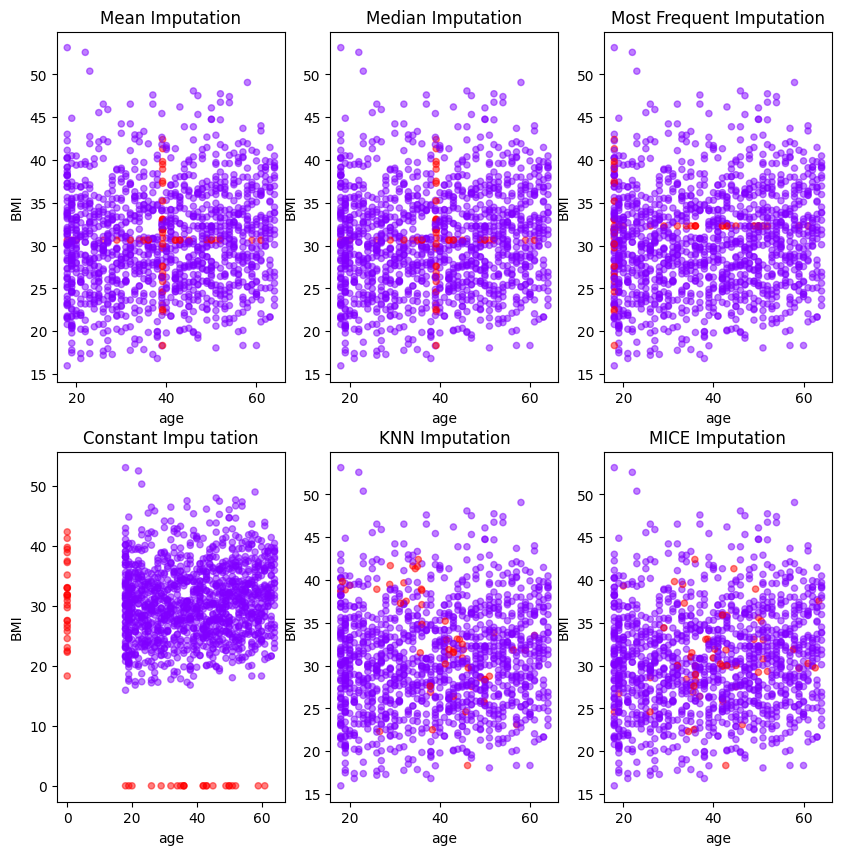

In [ ]:
 #as we have learnt in EDA sessions ploting each of the imputation results and picking the best among all
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
nullity = df_final['age'].isnull() + df_final['BMI'].isnull() # we want to specify the color values for the data points based on the nullity values
imputations = {'Mean Imputation': df_mean,
               'Median Imputation': df_median,
               'Most Frequent Imputation': df_mode,
               'Constant Impu tation': df_constant,
               'KNN Imputation': df_knn,
              'MICE Imputation': df_MICE}
#This loop iterates through the subplot axes and the keys of the imputations dictionary simultaneously using the zip() function.
#axes.flatten() is used to flatten the 2D array of subplot axes into a 1D array.
for ax, df_key in zip(axes.flatten(), imputations):

  #For each iteration of the loop, it accesses the DataFrame associated with the current df_key from the imputations dictionary.
    imputations[df_key].plot(x='age', y='BMI', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)
    #alpha=0.5 controls the transparency of the data points in the scatter plot.
    #c=nullity specifies the color values for the data points based on the nullity values. This could be a measure of missingness in the dataset.
    #cmap='rainbow' specifies the colormap to be used for coloring the data points.
    #ax=ax assigns the current subplot axis to which the scatter plot will be added.
    #colorbar=False suppresses the display of the colorbar.





In [ ]:
df_knn.describe(include="all")

age          BMI     Children  health_insurance_price  \
count  1338.000000  1338.000000  1338.000000             1338.000000   
mean     39.191229    30.711817     1.094918            13265.903361   
std      13.960142     6.111972     1.205493            12105.317734   
min      18.000000    15.960000     0.000000             1121.873900   
25%      27.000000    26.315000     0.000000             4746.521225   
50%      39.000000    30.495000     1.000000             9382.033000   
75%      51.000000    34.700000     2.000000            16584.318157   
max      64.000000    53.130000     5.000000            63770.428010   

       gender_female  gender_male  gender_nan  smoking_status_no  \
count    1338.000000  1338.000000      1338.0        1338.000000   
mean        0.494768     0.505232         0.0           0.795217   
std         0.500160     0.500160         0.0           0.403694   
min         0.000000     0.000000         0.0           0.000000   
25%         0.000000     0.000000         0.0           1.000000   
50%         0.000000     1.000000         0.0           1.000000   
75%         1.000000     1.000000         0.0           1.000000   
max         1.000000     1.000000         0.0           1.000000   

       smoking_status_yes  smoking_status_nan  location_northeast  \
count         1338.000000              1338.0         1338.000000   
mean             0.204783                 0.0            0.242152   
std              0.403694                 0.0            0.428546   
min              0.000000                 0.0            0.000000   
25%              0.000000                 0.0            0.000000   
50%              0.000000                 0.0            0.000000   
75%              0.000000                 0.0            0.000000   
max              1.000000                 0.0            1.000000   

       location_northwest  location_southeast  location_southwest  \
count         1338.000000         1338.000000         1338.000000   
mean             0.242900            0.272048            0.242900   
std              0.428995            0.445181            0.428995   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            1.000000            0.000000   
max              1.000000            1.000000            1.000000   

       location_nan  
count        1338.0  
mean            0.0  
std             0.0  
min             0.0  
25%             0.0  
50%             0.0  
75%             0.0  
max             0.0

In [ ]:
df_MICE.describe()

age          BMI     Children  health_insurance_price  \
count  1338.000000  1338.000000  1338.000000             1338.000000   
mean     39.221552    30.642142     1.094918            13282.167197   
std      13.971996     6.073035     1.205493            12117.188785   
min      18.000000    15.960000     0.000000             1121.873900   
25%      27.000000    26.315000     0.000000             4746.521225   
50%      39.000000    30.300000     1.000000             9388.753650   
75%      51.000000    34.496250     2.000000            16639.912515   
max      64.000000    53.130000     5.000000            63770.428010   

       gender_female  gender_male  gender_nan  smoking_status_no  \
count    1338.000000  1338.000000      1338.0        1338.000000   
mean        0.494768     0.505232         0.0           0.795217   
std         0.500160     0.500160         0.0           0.403694   
min         0.000000     0.000000         0.0           0.000000   
25%         0.000000     0.000000         0.0           1.000000   
50%         0.000000     1.000000         0.0           1.000000   
75%         1.000000     1.000000         0.0           1.000000   
max         1.000000     1.000000         0.0           1.000000   

       smoking_status_yes  smoking_status_nan  location_northeast  \
count         1338.000000              1338.0         1338.000000   
mean             0.204783                 0.0            0.242152   
std              0.403694                 0.0            0.428546   
min              0.000000                 0.0            0.000000   
25%              0.000000                 0.0            0.000000   
50%              0.000000                 0.0            0.000000   
75%              0.000000                 0.0            0.000000   
max              1.000000                 0.0            1.000000   

       location_northwest  location_southeast  location_southwest  \
count         1338.000000         1338.000000         1338.000000   
mean             0.242900            0.272048            0.242900   
std              0.428995            0.445181            0.428995   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            1.000000            0.000000   
max              1.000000            1.000000            1.000000   

       location_nan  
count        1338.0  
mean            0.0  
std             0.0  
min             0.0  
25%             0.0  
50%             0.0  
75%             0.0  
max             0.0

Knn and Mice seems to have performed well. We can choose each of them and observed the metircs of each model. I am continuing with KNN here.



In [ ]:
df_knn.head()

age        BMI  Children  health_insurance_price  gender_female  \
0  19.0  38.853729         0             16884.92400              1   
1  18.0  33.770000         1              1725.55230              0   
2  28.0  33.000000         3              4449.46200              0   
3  33.0  22.705000         0             21984.47061              0   
4  32.0  28.880000         0              3866.85520              0   

   gender_male  gender_nan  smoking_status_no  smoking_status_yes  \
0            0           0                  0                   1   
1            1           0                  1                   0   
2            1           0                  1                   0   
3            1           0                  1                   0   
4            1           0                  1                   0   

   smoking_status_nan  location_northeast  location_northwest  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   1   
4                   0                   0                   1   

   location_southeast  location_southwest  location_nan  
0                   0                   1             0  
1                   1                   0             0  
2                   1                   0             0  
3                   0                   0             0  
4                   0                   0             0

Data Visualization:
The main aim of the visualization is to check whether the data is normally distributed or skewed for numerical data. For categorical datas it is required to check whether the data is balanced or unbalanced


Univariate analysis: The main aim is to check the distribution of the data.

<Axes: xlabel='age', ylabel='Count'>

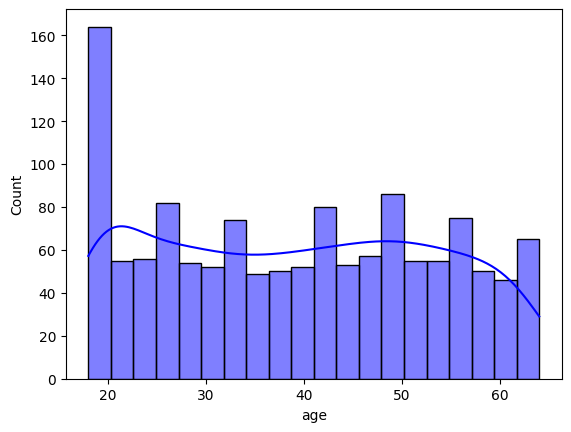

In [ ]:
sns.histplot(data=df,x='age',bins=20,color='blue',kde=True)

From the histplot  it is clear that the age of the most of the customers falls in range in 18-21 and there are lesser number of customer in the range 39-41 comparatively.

<ipython-input-47-67e1daed57ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df.Children, palette=["#fc9272","#7fcdbb","#bcbddc","#efedf5","#fee0d2"])
<ipython-input-47-67e1daed57ad>:1: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(x=df.Children, palette=["#fc9272","#7fcdbb","#bcbddc","#efedf5","#fee0d2"])


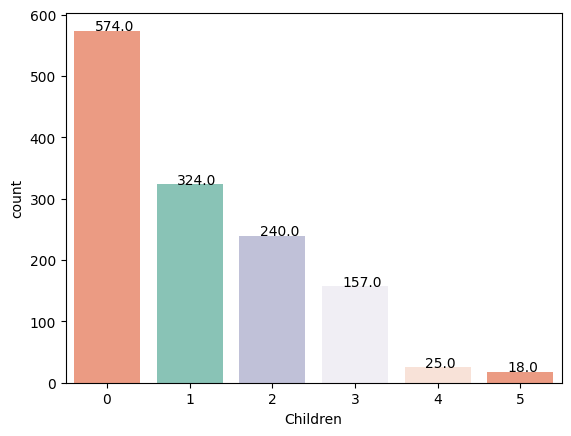

In [ ]:
ax=sns.countplot(x=df.Children, palette=["#fc9272","#7fcdbb","#bcbddc","#efedf5","#fee0d2"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

<ipython-input-48-cb0b7f774a67>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(x=df.smoking_status, palette=["#edf8b1", "#7fcdbb"])


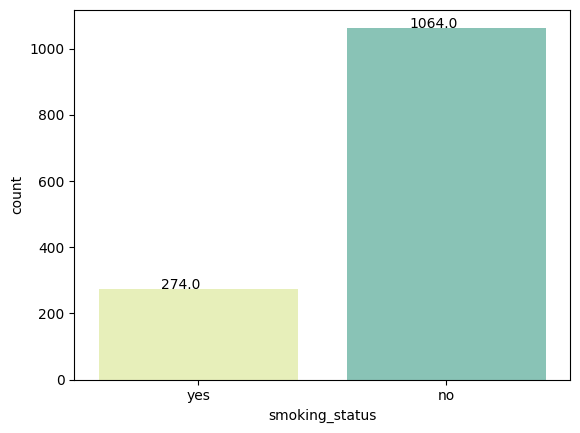

In [ ]:
ax =sns.countplot(x=df.smoking_status, palette=["#edf8b1", "#7fcdbb"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

From the above plot it is observed that majority of the customers are non smokers

<ipython-input-49-c80edbf4c753>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(x=df.gender, palette=["#fc9272","#fee0d2"])


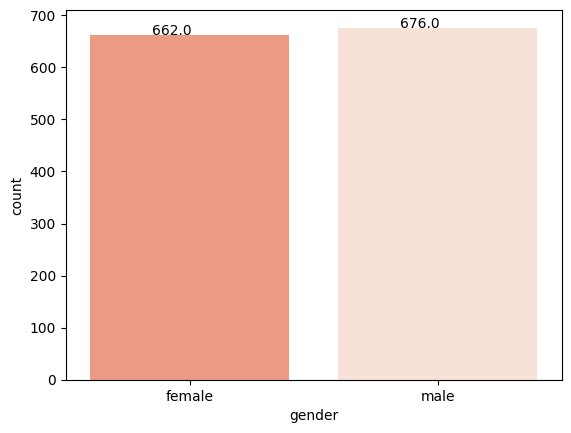

In [ ]:
ax =sns.countplot(x=df.gender, palette=["#fc9272","#fee0d2"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

It is observed that the ratio between the male and female are almost equal

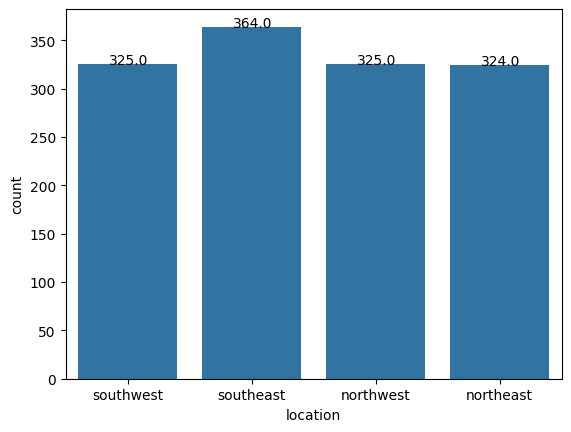

In [ ]:
ax =sns.countplot(x=df.location)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

As far as location is concerned, southeast people are the highest  whereas customers from other locations are almost equal in number.

<Axes: xlabel='BMI', ylabel='Count'>

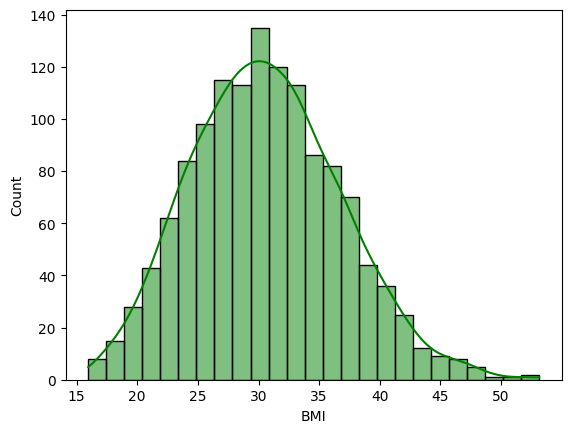

In [ ]:
sns.histplot(data = df['BMI'],color='green', kde = True)  # checking the distribution of numerical variable

From the above plot it is clear that the BMI of the customer is normally distributed.

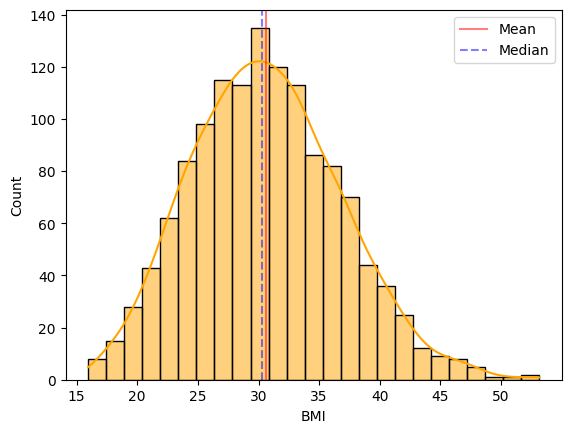

In [ ]:
sns.histplot(data = df['BMI'],color='orange', kde = True)
plt.axvline(x=df.BMI.mean(),color='red',alpha=0.5,label='Mean') # function used to add a vertical line
plt.axvline(x=df.BMI.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

Detecting outlier in the datset

<Axes: ylabel='age'>

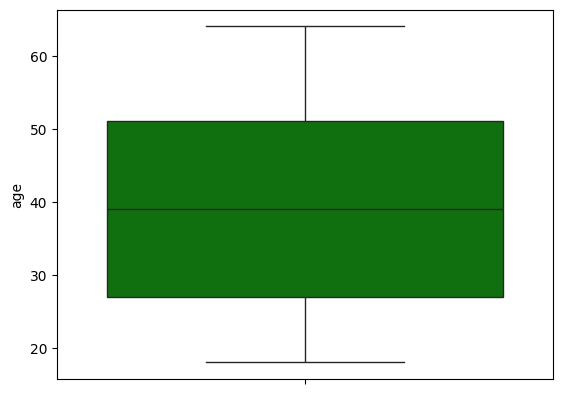

In [ ]:
sns.boxplot(data=df_knn["age"],color='green')

There is no outlier in the age column

<Axes: ylabel='BMI'>

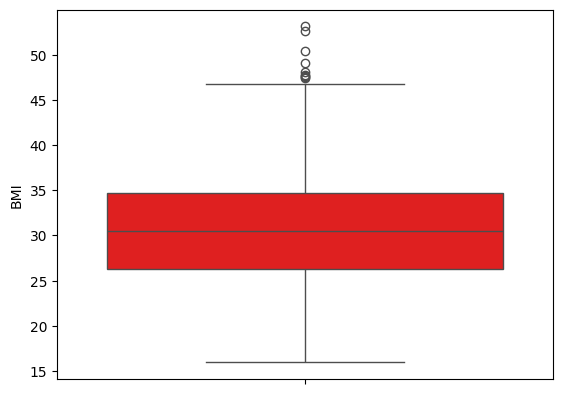

In [ ]:
sns.boxplot(data=df_knn['BMI'],color='red')

Outliers are present in the BMI column


In [ ]:
df_knn_cpy=df_knn.copy()

In [ ]:
# removing outliers using IQR

In [ ]:
Q1=df_knn['BMI'].quantile(0.25)
Q3=df_knn['BMI'].quantile(0.75)
print(Q3,Q1)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print(upper_bound)
print(lower_bound)

34.5 26.29
46.815
13.974999999999998


In [ ]:
df_knn.shape

(1329, 15)

In [ ]:
df_knn=df_knn[df_knn.BMI<upper_bound]
df_knn=df_knn[df_knn.BMI>lower_bound]

In [ ]:
df_knn.shape

(1329, 15)

<Axes: ylabel='BMI'>

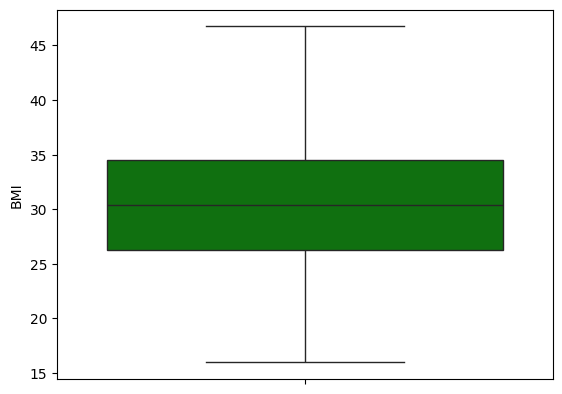

In [ ]:
sns.boxplot(df_knn['BMI'],color='green')

In [ ]:
df.head()

age  gender     BMI  Children smoking_status   location  \
0  19.0  female     NaN         0            yes  southwest   
1  18.0    male  33.770         1             no  southeast   
2  28.0    male  33.000         3             no  southeast   
3  33.0    male  22.705         0             no  northwest   
4  32.0    male  28.880         0             no  northwest   

   health_insurance_price  
0             16884.92400  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520

<Axes: xlabel='age', ylabel='health_insurance_price'>

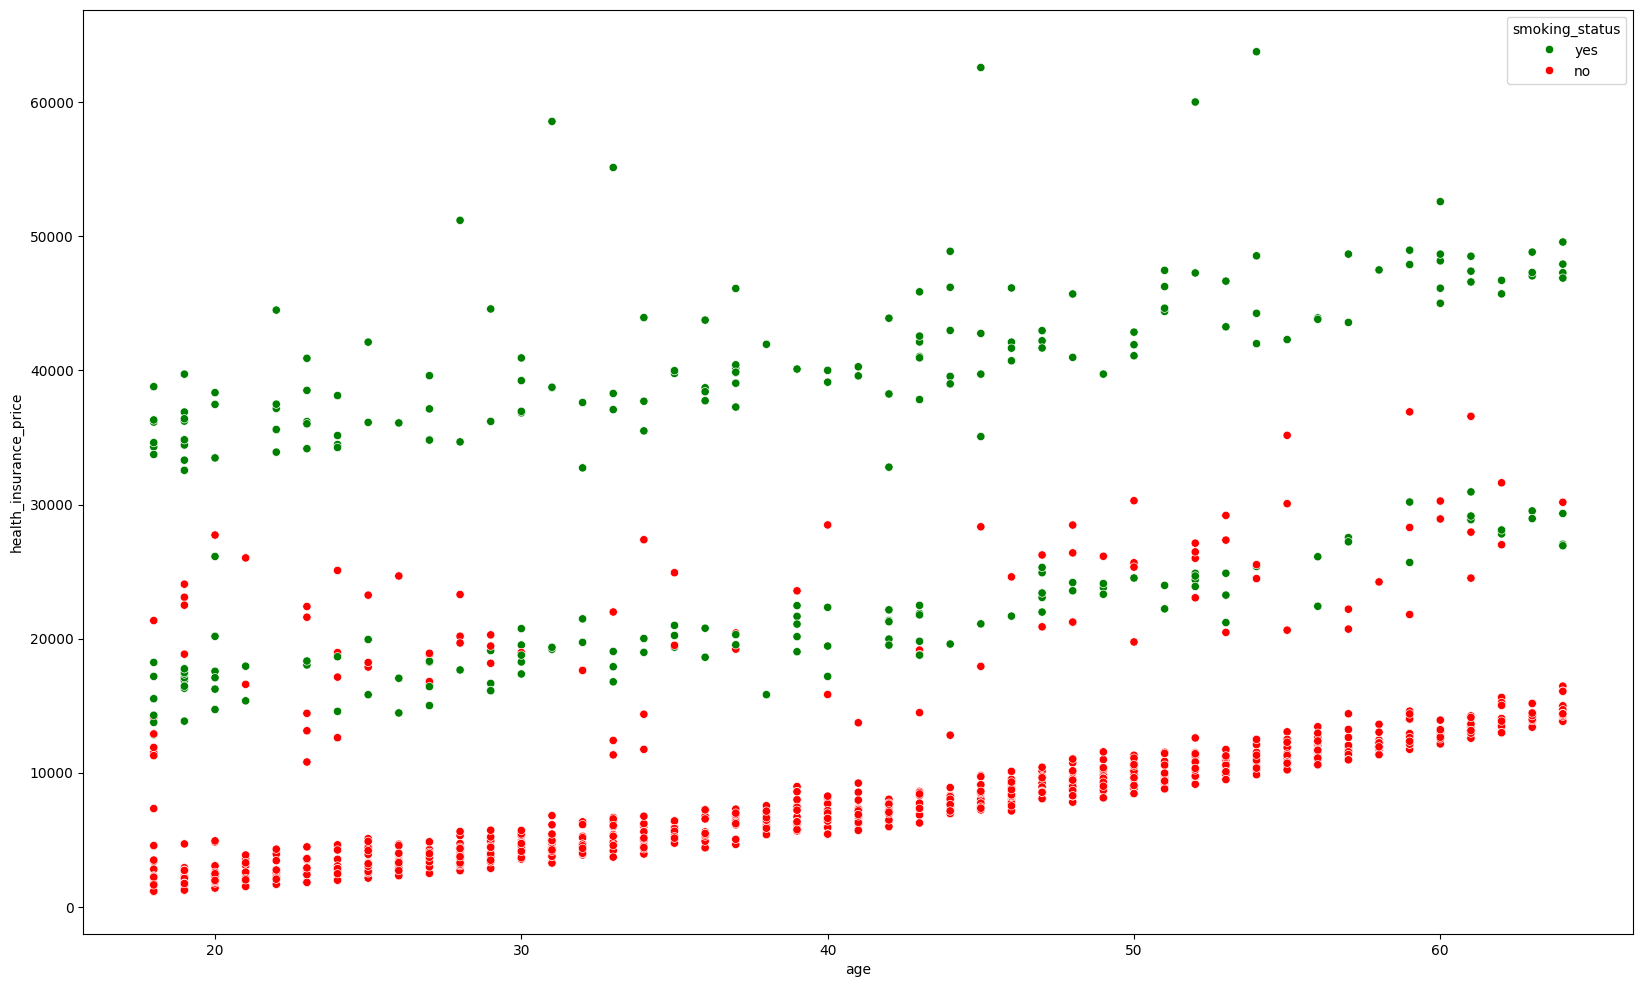

In [ ]:
#Numerial-Numerical Variables
plt.figure(figsize=(20,12))
sns.scatterplot(x=df['age'],y=df['health_insurance_price'],hue=df['smoking_status'],palette=['green','red'])

Observation:
From above plot it is evident that increase in age causes increase in price in case of non smokers, for smokers the price is even more higher

<Axes: xlabel='BMI', ylabel='health_insurance_price'>

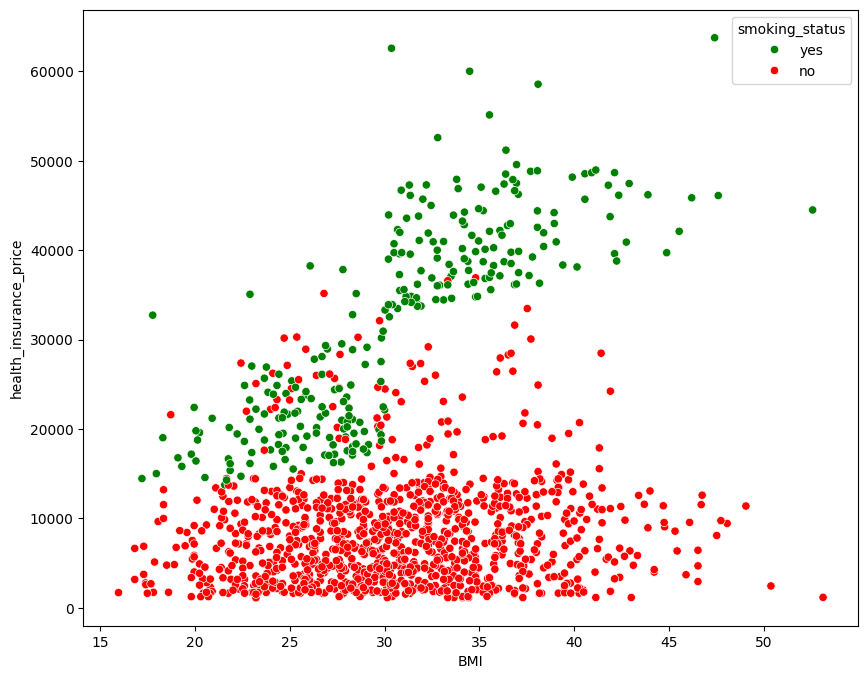

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['BMI'], y=df['health_insurance_price'],hue=df['smoking_status'],palette=['green','red'])


it appears that the BMI smokers increases their price

<ipython-input-77-567e33a61173>:2: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=df['age'],y=df['health_insurance_price'],hue=df['Children'],palette=['orange','green','blue','violet','red'])


<Axes: xlabel='age', ylabel='health_insurance_price'>

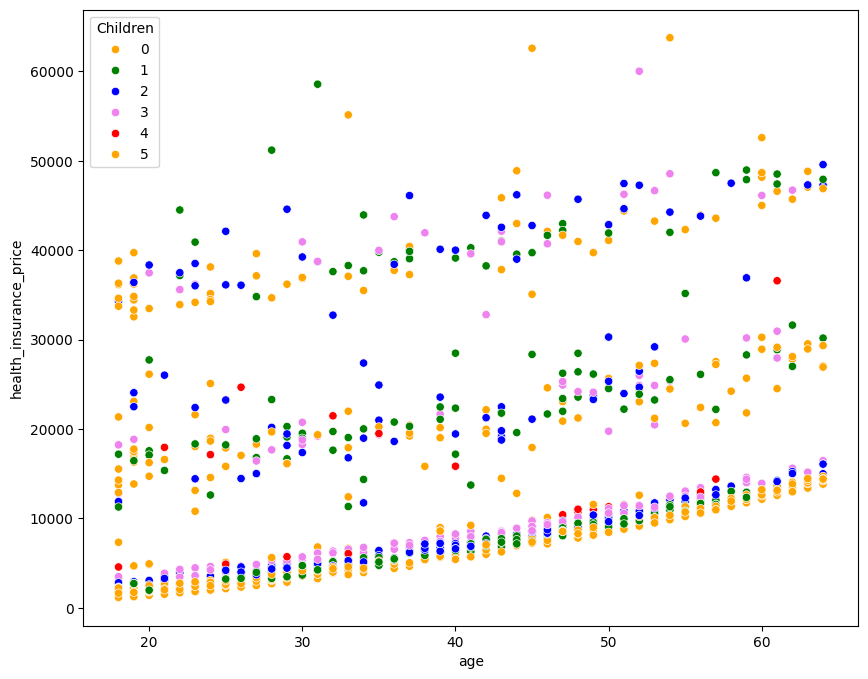

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['age'],y=df['health_insurance_price'],hue=df['Children'],palette=['orange','green','blue','violet','red'])

It seems that BMI is not having much impact on health_insurance_price Smoking is the feature which is more impacting the health_insufrance_cost

Categorical and Numerical variables


<ipython-input-135-1ab27eb395ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='gender',y='health_insurance_price',palette=['blue','green'])


<Axes: xlabel='gender', ylabel='health_insurance_price'>

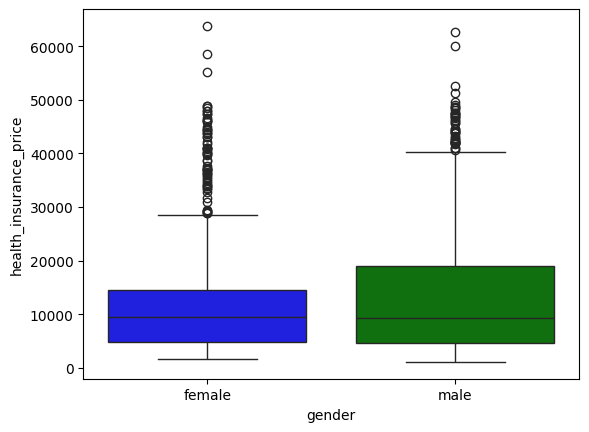

In [ ]:
#Again using the original dataset
sns.boxplot(data=df,x='gender',y='health_insurance_price',palette=['blue','green'])

<ipython-input-138-2ee2ec4a0065>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='smoking_status',y='health_insurance_price',palette=['red','green'])


<Axes: xlabel='smoking_status', ylabel='health_insurance_price'>

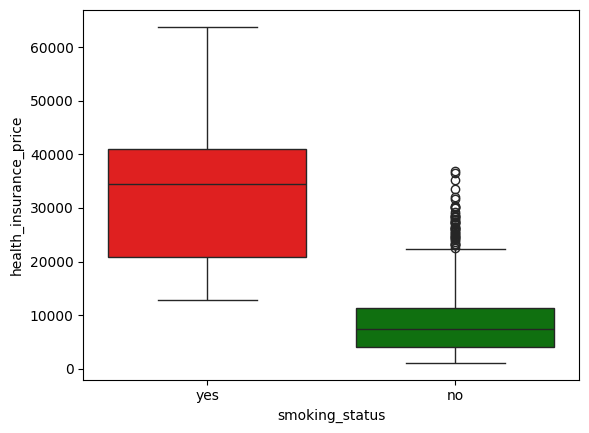

In [ ]:
# boxplot for smoking status VS health_insurance_price
sns.boxplot(data=df,x='smoking_status',y='health_insurance_price',palette=['red','green'])

There is an impact in the smoking_status on health_insurance_price.If the status is yes the helth insurance price is high for them.

<ipython-input-139-5958960a7cbd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='location', y='health_insurance_price',palette=['green','violet','blue','orange'])


<Axes: xlabel='location', ylabel='health_insurance_price'>

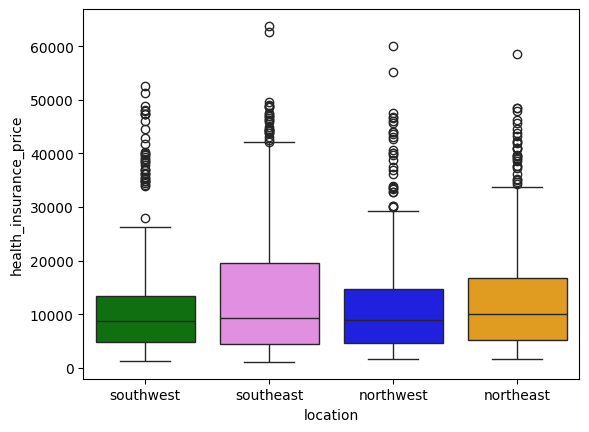

In [ ]:
sns.boxplot(data=df,x='location', y='health_insurance_price',palette=['green','violet','blue','orange'])

<ipython-input-80-9c1340698e7e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df ,x="Children", y="health_insurance_price",palette=['yellow','pink','violet','dodgerblue',"red","green"])


<Axes: xlabel='Children', ylabel='health_insurance_price'>

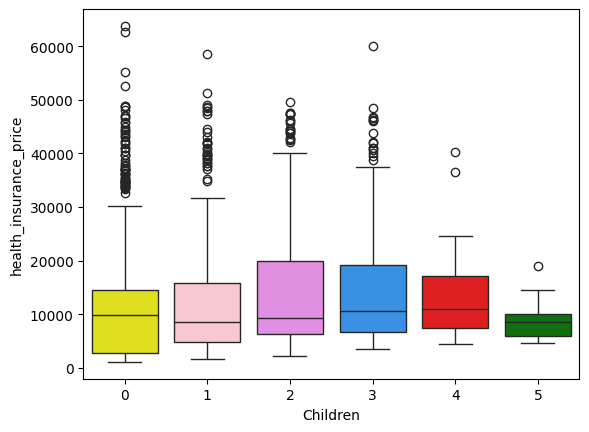

In [ ]:
#box plot between children and insurance price

sns.boxplot(data=df ,x="Children", y="health_insurance_price",palette=['yellow','pink','violet','dodgerblue',"red","green"])

<ipython-input-83-8de7221f9395>:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=df ,x="Children", y="health_insurance_price",hue="smoking_status", palette=['yellow','pink','violet','dodgerblue',"red","green"])


<Axes: xlabel='Children', ylabel='health_insurance_price'>

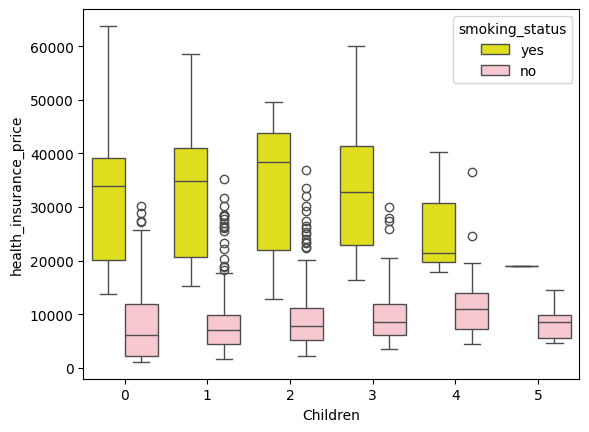

In [ ]:
sns.boxplot(data=df ,x="Children", y="health_insurance_price",hue="smoking_status", palette=['yellow','pink','violet','dodgerblue',"red","green"])

<ipython-input-85-adcaa4e9e5aa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Children", y="age",palette=['green','yellow',"blue","red","pink"])
<ipython-input-85-adcaa4e9e5aa>:1: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x="Children", y="age",palette=['green','yellow',"blue","red","pink"])


<Axes: xlabel='Children', ylabel='age'>

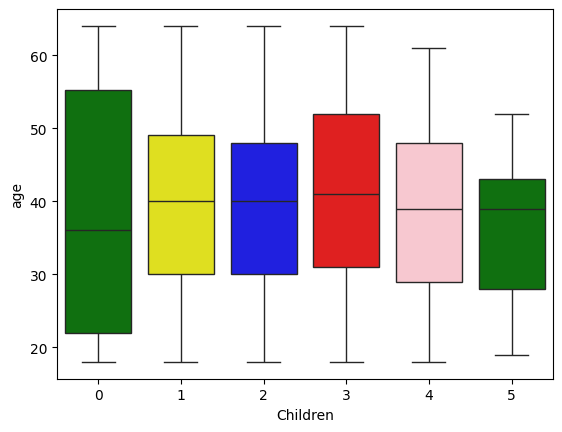

In [ ]:
sns.boxplot(data=df, x="Children", y="age",palette=['green','yellow',"blue","red","pink"])

Box plot between children and age


<ipython-input-86-377421122c4f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Children", y="BMI",palette=['Green','yellow',"violet","brown","red"])
<ipython-input-86-377421122c4f>:1: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x="Children", y="BMI",palette=['Green','yellow',"violet","brown","red"])


<Axes: xlabel='Children', ylabel='BMI'>

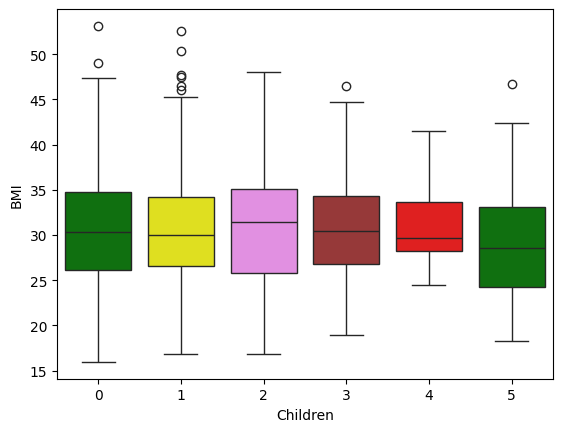

In [ ]:
sns.boxplot(data=df, x="Children", y="BMI",palette=['Green','yellow',"violet","brown","red"])

From the above plot we can say that the no of children is not having much impact on the health_insurance_price

In [ ]:
df_knn=df_knn.drop(['gender_nan','smoking_status_nan','location_nan'],axis=1)

In [ ]:
#checking the corelation
df_corr=pd.DataFrame(df_knn)
print(df_corr.corr(method='spearman'))

                             age       BMI  Children  health_insurance_price  \
age                     1.000000  0.092505  0.053691                0.533044   
BMI                     0.092505  1.000000  0.017536                0.117573   
Children                0.053691  0.017536  1.000000                0.133347   
health_insurance_price  0.533044  0.117573  0.133347                1.000000   
gender_female           0.020284 -0.043833 -0.017342               -0.013816   
gender_male            -0.020284  0.043833  0.017342                0.013816   
smoking_status_no       0.020629 -0.003038 -0.016300               -0.661591   
smoking_status_yes     -0.020629  0.003038  0.016300                0.661591   
location_northeast      0.000272 -0.126091 -0.027658                0.047263   
location_northwest      0.001285 -0.117986  0.034324               -0.021533   
location_southeast     -0.020028  0.230326 -0.015881                0.017744   
location_southwest      0.019118  0.0062

In [ ]:
df_knn.head()

age        BMI  Children  health_insurance_price  gender_female  \
0  19.0  38.853729         0             16884.92400              1   
1  18.0  33.770000         1              1725.55230              0   
2  28.0  33.000000         3              4449.46200              0   
3  33.0  22.705000         0             21984.47061              0   
4  32.0  28.880000         0              3866.85520              0   

   gender_male  smoking_status_no  smoking_status_yes  location_northeast  \
0            0                  0                   1                   0   
1            1                  1                   0                   0   
2            1                  1                   0                   0   
3            1                  1                   0                   0   
4            1                  1                   0                   0   

   location_northwest  location_southeast  location_southwest  
0                   0                   0                   1  
1                   0                   1                   0  
2                   0                   1                   0  
3                   1                   0                   0  
4                   1                   0                   0

In [ ]:
df_knn.isnull().sum()

age                       0
BMI                       0
Children                  0
health_insurance_price    0
gender_female             0
gender_male               0
smoking_status_no         0
smoking_status_yes        0
location_northeast        0
location_northwest        0
location_southeast        0
location_southwest        0
dtype: int64

In [ ]:
#Examining Multicolinearity Using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_vif=df_knn.drop(['health_insurance_price'],axis=1)
vif_df = pd.DataFrame()
vif_df["feature"] = x_vif.columns

# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(x_vif.values, i)
                          for i in range(len(x_vif.columns))]

print(vif_df)

               feature       VIF
0                  age  1.013587
1                  BMI  1.088356
2             Children  1.003822
3        gender_female       inf
4          gender_male       inf
5    smoking_status_no       inf
6   smoking_status_yes       inf
7   location_northeast       inf
8   location_northwest       inf
9   location_southeast       inf
10  location_southwest       inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
 #Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
x_vif = df_knn.drop(['health_insurance_price',"gender_female","smoking_status_no","location_southwest"], axis=1)

# VIF dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = x_vif.columns

# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(x_vif.values, i)
                          for i in range(len(x_vif.columns))]

print(vif_df)

              feature        VIF
0                 age   7.806220
1                 BMI  10.751591
2            Children   1.807557
3         gender_male   2.003643
4  smoking_status_yes   1.264723
5  location_northeast   1.833477
6  location_northwest   1.839142
7  location_southeast   2.132698


In [ ]:
x_vif.head()

age        BMI  Children  gender_male  smoking_status_yes  \
0  19.0  38.853729         0            0                   1   
1  18.0  33.770000         1            1                   0   
2  28.0  33.000000         3            1                   0   
3  33.0  22.705000         0            1                   0   
4  32.0  28.880000         0            1                   0   

   location_northeast  location_northwest  location_southeast  
0                   0                   0                   0  
1                   0                   0                   1  
2                   0                   0                   1  
3                   0                   1                   0  
4                   0                   1                   0

A VIF value greater than 5 (some sources suggest 10) is often considered indicative of multicollinearity. When VIF values are high, it suggests that the variance of the coefficient estimates is inflated, making the estimates less reliable.
In EDA (Exploratory Data Analysis) and ML (Machine Learning), multicollinearity is a concern because it can affect the performance and interpretability of the models. High VIF values indicate that there may be redundant information in the features, which can lead to overfitting and less generalizable models.

In [ ]:
X=x_vif.drop(['age','BMI'],axis=1)

In [ ]:
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_df)

              feature       VIF
0            Children  1.573202
1         gender_male  1.725221
2  smoking_status_yes  1.245483
3  location_northeast  1.314837
4  location_northwest  1.325890
5  location_southeast  1.377983


After dropping the columns with VIF>5 we are left with minimum no. of features.In the interest of avoiding multicolinearity we lost many of the features.

Therefore,I am not using Linear regression as it did not perform well when I checked it because of which I have chosen non -parametric algorithms. like rf, DT and SVM (Support Vector Machines with Gaussian Kernels)

In [ ]:
# Separating the dependent and independent variables
X=df_knn.drop(('health_insurance_price'),axis=1)
y=df_knn["health_insurance_price"]

In [ ]:
X.head()

age        BMI  Children  gender_female  gender_male  smoking_status_no  \
0  19.0  38.853729         0              1            0                  0   
1  18.0  33.770000         1              0            1                  1   
2  28.0  33.000000         3              0            1                  1   
3  33.0  22.705000         0              0            1                  1   
4  32.0  28.880000         0              0            1                  1   

   smoking_status_yes  location_northeast  location_northwest  \
0                   1                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   1   
4                   0                   0                   1   

   location_southeast  location_southwest  
0                   0                   1  
1                   1                   0  
2                   1                   0  
3                   0                   0  
4                   0                   0

In [ ]:
y.head(5)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: health_insurance_price, dtype: float64

In [ ]:
X.shape

(1329, 11)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
rfe = RFE(estimator=DecisionTreeRegressor(random_state=0), n_features_to_select=8) # taking only 8 features
rfe=rfe.fit(X,y)
print(X.columns)
print(rfe.support_)
rfe.ranking_

Index(['age', 'BMI', 'Children', 'gender_female', 'gender_male',
       'smoking_status_no', 'smoking_status_yes', 'location_northeast',
       'location_northwest', 'location_southeast', 'location_southwest'],
      dtype='object')
[ True  True  True False  True  True False  True  True  True False]


array([1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Featutre Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.13381825,  0.59030552, -0.09862461, ...,  1.7484999 ,
        -0.62558873, -0.56612445],
       [-1.49422692,  1.1225276 , -0.09862461, ..., -0.57191882,
         1.59849427, -0.56612445],
       [ 0.00938266, -0.10818374, -0.09862461, ..., -0.57191882,
        -0.62558873, -0.56612445],
       ...,
       [ 0.15258357, -1.10829336, -0.09862461, ..., -0.57191882,
        -0.62558873, -0.56612445],
       [ 0.79698768,  2.37245574, -0.09862461, ..., -0.57191882,
         1.59849427, -0.56612445],
       [ 0.58218631, -1.08155693, -0.09862461, ..., -0.57191882,
        -0.62558873,  1.76639606]])

In [ ]:
X_test=sc.transform(X_test)
X_test

array([[-1.35102601, -1.43247258, -0.09862461, ..., -0.57191882,
        -0.62558873,  1.76639606],
       [ 0.08098312, -0.16249211, -0.91767116, ..., -0.57191882,
        -0.62558873,  1.76639606],
       [ 0.22418403, -0.09565104, -0.91767116, ..., -0.57191882,
        -0.62558873,  1.76639606],
       ...,
       [ 0.72538722, -0.83090289,  0.72042194, ..., -0.57191882,
        -0.62558873,  1.76639606],
       [-1.42262646,  0.00293955, -0.91767116, ...,  1.7484999 ,
        -0.62558873, -0.56612445],
       [-0.42022008, -1.40991372, -0.09862461, ..., -0.57191882,
        -0.62558873, -0.56612445]])

In [ ]:
# using ranked 1 columns to create X dataframe
X=X[["age", "BMI", "Children","gender_female","smoking_status_yes","location_northeast","location_northwest","location_southeast"]]
X.shape

(1329, 8)

In [ ]:
y.shape

(1329,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

Text(0, 0.5, 'predicted health_insurance_price')

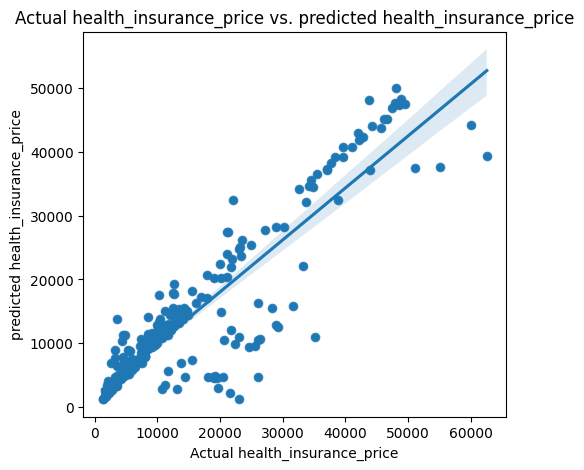

In [ ]:
 #plotting actual and predicted values using scatterplot below
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = y_pred, ax=ax1)
sns.regplot(x = y_test, y=y_pred, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Adjusted R^2:",(1 - (1-rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 3102.0453025763322
MSE: 33807606.76205454
RMSE: 5814.430906120954
Adjusted R^2: 0.9758169707841636


In [ ]:
# importing cost function libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Support Vector Machine

In [ ]:
# Importing SVR library and creating model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred1 = regressor.predict(X_test) # prediciting y

In [ ]:
# Calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 9308.057585264904
MSE: 204687667.5216276
RMSE: 14306.909782396324


Text(0, 0.5, 'predicted health_insurance_price')

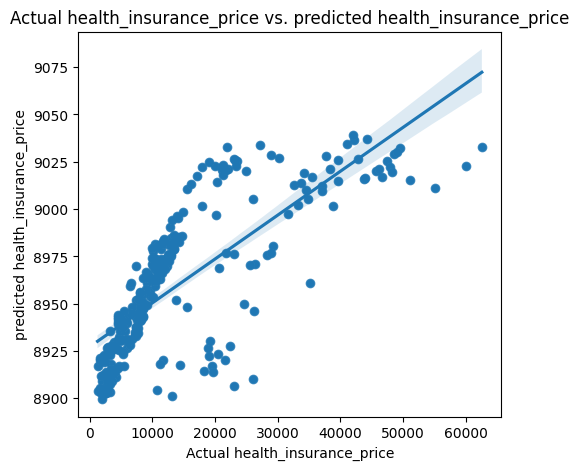

In [ ]:
# plotting actual and predicted values using scatterplot below
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = y_pred1, ax=ax1)
sns.regplot(x = y_test, y=y_pred1, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

In [ ]:
#after scaling
# Importing SVR library and creating model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred1 = regressor.predict(X_test) # prediciting y

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("Adjusted R^2:",(1 - (1-regressor.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 9308.057585264904
MSE: 204687667.5216276
RMSE: 14306.909782396324
Adjusted R^2: -0.11400427837514693


Text(0, 0.5, 'predicted health_insurance_price')

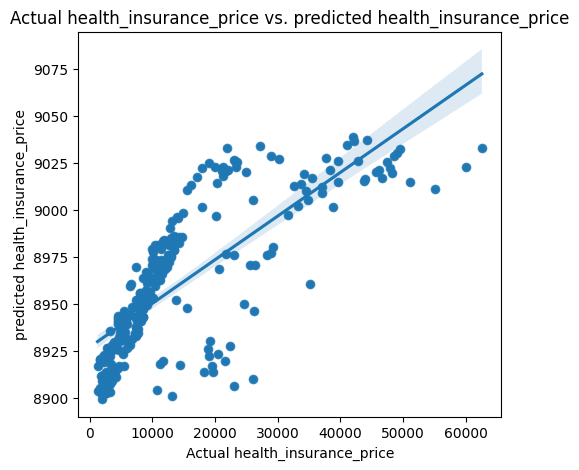

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = y_pred1, ax=ax1)
sns.regplot(x = y_test, y=y_pred1, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
#Fitting the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:28:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
# we have to #Compute the rmse by invoking the mean_sqaured_error function from sklearn's
#metrics module.
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 9570.217373


In [ ]:
#Adjusted R^2
print("Adjusted R^2:",(1 - (1-xg_reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

Adjusted R^2: 0.5359986188934536


Text(0, 0.5, 'predicted health_insurance_price')

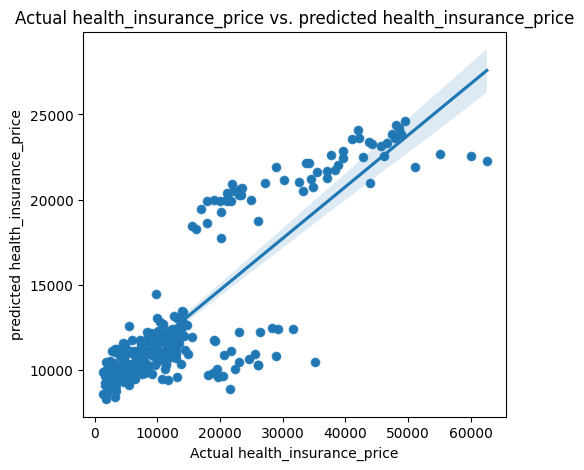

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = preds, ax=ax1)
sns.regplot(x = y_test, y=preds, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

Decision Tree Regressor


In [ ]:
# importing DecisionTreeRegressor from sklearn library
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#creating an object for our model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 6493.328583


Text(0, 0.5, 'predicted health_insurance_price')

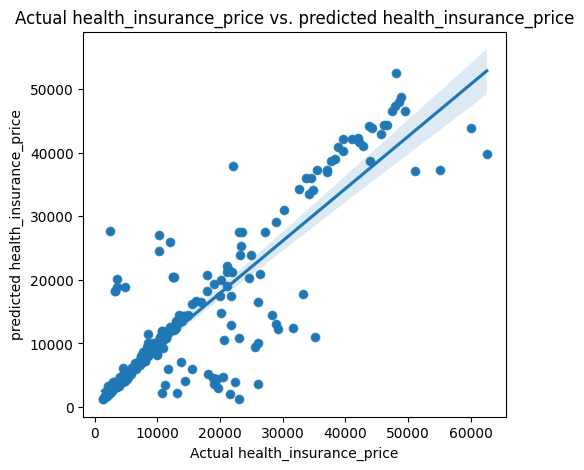

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = predictions, ax=ax1)
sns.regplot(x = y_test, y=predictions, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

In [ ]:
from sklearn import tree
#model = tree.DecisionTreeRegressor(random_state=44)
#model.fit(X_train, y_train)
#tree.plot_tree(model)

In [ ]:
#adding graphics to the tree
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#adding graphics to the tree
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
model.score(X_train,y_train) #R^2 close to 1

0.9981942431243136

In [ ]:
model.score(X_test,y_test)


0.7526157549781847

our model is overfiting the training data. therefore, we need to initialize hyperparameters to our model to avoid letting it split till the leafnode.

We got almost 100% score on training data.

On test data we got 75% score.

That's why we are getting high score on our training data and less score on test data.

Let's perform hyperparameter tuning to address this issue.

There are ample tuning methods but we are going to use GridSearch or RandomizedSearch for hyper parameters tuning.


In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RS = RandomizedSearchCV(estimator=model,param_distributions=parameters,cv=5,n_iter=300,n_jobs=-1, verbose=True, scoring='neg_mean_squared_error')

In [ ]:
RS.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
670 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _va

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
                                                                     0.9],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error', verbose=True)

In [ ]:
#let’s check the best parameters and the best score
print('Best Parameters:',RS.best_params_,end='\n\n')
print('Best Score:',RS.best_score_)

Best Parameters: {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 3, 'max_leaf_nodes': 80, 'max_features': 'auto', 'max_depth': 11}

Best Score: -30894808.26956389


In [ ]:
tuned_model= DecisionTreeRegressor(max_depth=9,max_features=None,max_leaf_nodes=20,
                                         min_samples_leaf=4,min_weight_fraction_leaf=0.1,splitter='best')

In [ ]:
tuned_model.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=9, max_leaf_nodes=20, min_samples_leaf=4,
                      min_weight_fraction_leaf=0.1)

In [ ]:
tuned_pred=tuned_model.predict(X_test)

Text(0, 0.5, 'predicted health_insurance_price')

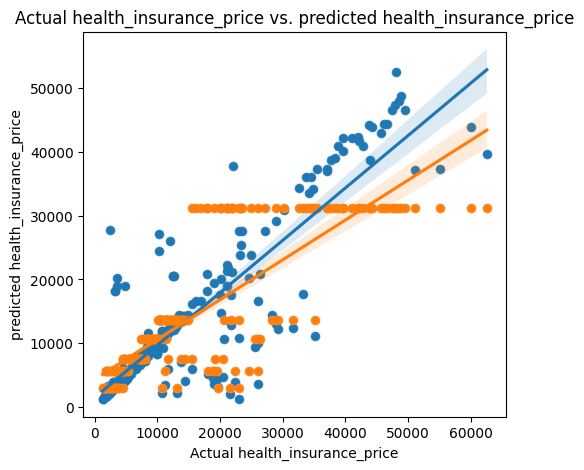

In [ ]:
fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])


sns.scatterplot(x = y_test, y = predictions, ax=ax1)
sns.regplot(x = y_test, y=predictions, ax=ax1)

sns.scatterplot(x = y_test, y = tuned_pred, ax=ax1)
sns.regplot(x = y_test, y=tuned_pred, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

There is significant improvement after tuning


In [ ]:
#model's score on training data
tuned_model.score(X_train,y_train)

0.704124740552907

In [ ]:
#model's score on test data
tuned_model.score(X_test,y_test)


0.6556630353376202

the difference between the R^2 values with and without hyperparameter tuning.
Earlier, it was overfitting on the training data but it did not overfit post hyperparameter tuning.

In [ ]:
# With hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))
print("Adjusted R^2:",(1 - (1-tuned_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 4860.803678770836
MSE: 58687602.68616668
RMSE: 7660.783425092154
Adjusted R^2: 0.7010280442123571


In [ ]:
# without hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("Adjusted R^2:",(1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 3127.388401090225
MSE: 42163316.09036744
RMSE: 6493.328583274331
Adjusted R^2: 0.9981753436708097


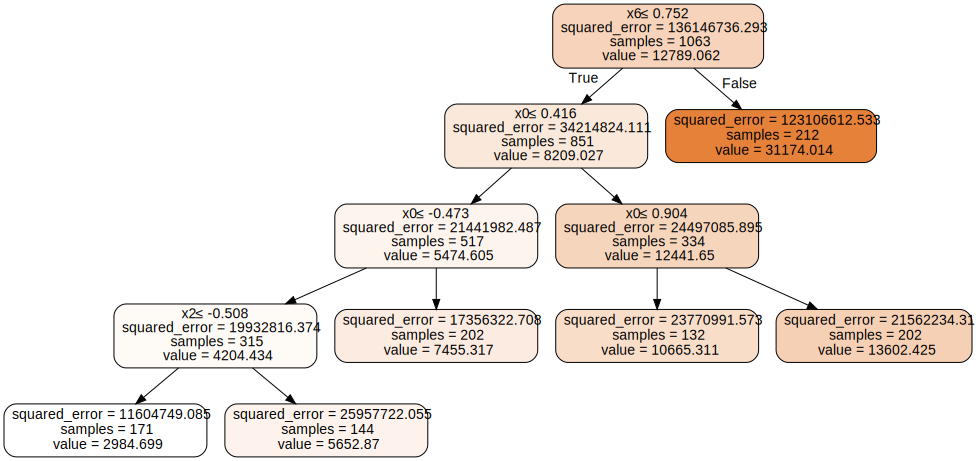

In [ ]:
#Visualising the decision tree post tuning
import graphviz
dot_data = tree.export_graphviz(tuned_model, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Hyper parameters range intialization for tuning
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
parameters={'n_estimators': n_estimators,
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           'min_samples_split': min_samples_split,
           "max_features":["auto","sqrt",None]
           }

In [ ]:
RRF = RandomizedSearchCV(rf, param_distributions=parameters, cv=5, n_iter=10,n_jobs=-1)
#cross validation is 5 with n_jobs = -1 ( that is parallel processing

# fit the object
RRF.fit(X_train, y_train)

# Display the best estimator
print(RRF.best_estimator_)
print(RRF.best_score_)

# Display the best selected parameter by the randomizedSearchCV
print(RRF.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=7,
                      min_samples_split=10, n_estimators=400)
0.8584920054408883
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 5}


In [ ]:
RRF = RandomizedSearchCV(rf, param_distributions=parameters, cv=5, n_iter=10,n_jobs=-1)
#cross validation is 5 with n_jobs = -1 ( that is parallel processing

# fit the object
RRF.fit(X_train, y_train)

# Display the best estimator
print(RRF.best_estimator_)

# Display the best score
print(RRF.best_score_)

# Display the best selected parameter by the randomizedSearchCV
print(RRF.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=11, max_features='auto', min_samples_leaf=9,
                      min_samples_split=10)
0.8586132845085162
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': 'auto', 'max_depth': 11}


In [ ]:
tuned_rf= RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=10,)


In [ ]:
tuned_rf.fit(X_train,y_train)  # fitting the model here

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=10)

In [ ]:
# prediction

tuned_rf_pred=tuned_rf.predict(X_test)

In [ ]:
#random forest in it's naive form
rf.score(X_train,y_train)

0.9760674541376233

In [ ]:
rf.score(X_test,y_test) # R^2 value pre tuning

0.801641093482778

In [ ]:
#R^2 value of training data post tuning

tuned_rf.score(X_train,y_train)

0.8802641550097652

In [ ]:
tuned_rf.score(X_test,y_test)

0.8245042017448522

Text(0, 0.5, 'predicted health_insurance_price')

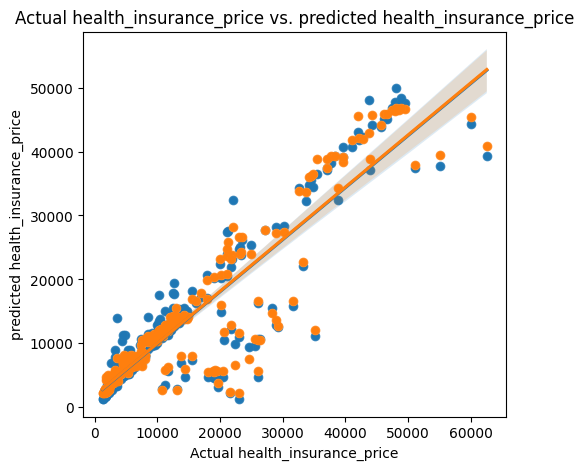

In [ ]:
#Before and After hyper parameter tuning of RandomForestRegressor(RFR)
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = y_pred, ax=ax1)
sns.regplot(x = y_test, y=y_pred, ax=ax1)

sns.scatterplot(x = y_test, y = tuned_rf_pred, ax=ax1)
sns.regplot(x = y_test, y=tuned_rf_pred, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

By looking at the above graph you can estimate that errors will be lesser post performing hyperparameter tuning.

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,tuned_rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_rf_pred)))
print("Adjusted R^2:",(1 - (1-tuned_rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 3045.5076382866487
MSE: 29910897.57438125
RMSE: 5469.085625073103
Adjusted R^2: 0.8790109729974982


In [ ]:
# Without hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Adjusted R^2:",(1 - (1-rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 3102.0453025763322
MSE: 33807606.76205454
RMSE: 5814.430906120954
Adjusted R^2: 0.9758169707841636


In [ ]:
#checking residuals for RandomForestRegressor
from yellowbrick.regressor import ResidualsPlot


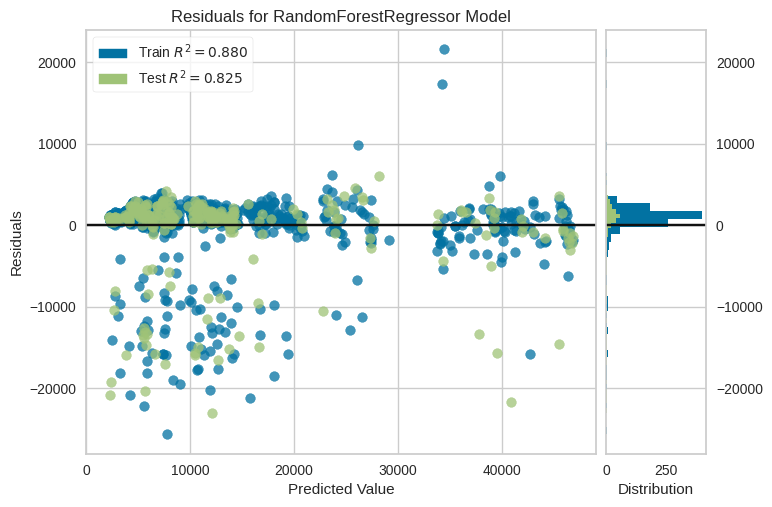

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer=ResidualsPlot(tuned_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

The coefficient of determination, or R^2,it is a statistical measure of how well the regression line approximates the actual data.

R^2= 0.880 of the variation in the y values from training data is accounted for by the x values.

R^2= 0.824 of the variation in the y values from training data is accounted for by the x values.

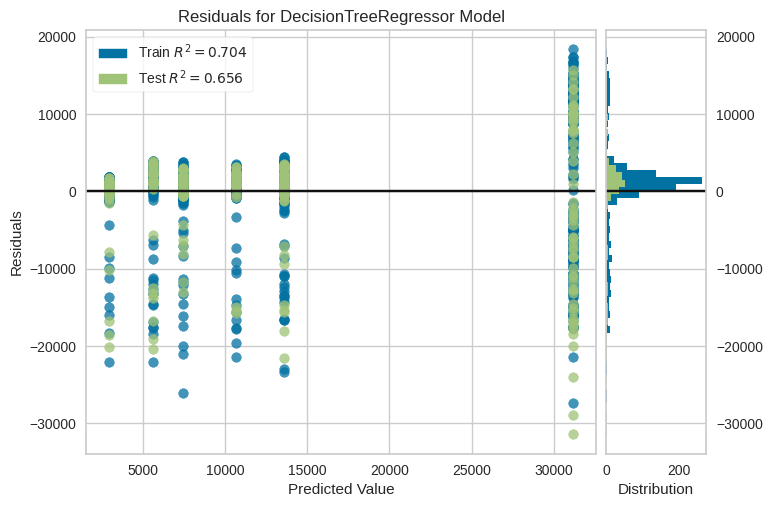

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer=ResidualsPlot(tuned_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [ ]:
# Performing crossvalidation to pick the best regression model
#Random Forest Regressor
from sklearn.model_selection import cross_val_score
score_train=cross_val_score(rf,X_train,y_train, scoring="neg_mean_squared_error",cv=10)

In [ ]:
score_train

array([-13757326.32880497, -25502636.21464136, -21072287.43961011,
       -22030466.67927694, -13782971.55871711, -29180575.48832748,
       -20394040.4569622 , -27410506.41548547, -23626003.12823616,
       -25649768.07229792])

In [ ]:
from numpy import absolute
print(absolute(np.mean(score_train)))

22240658.17823597


In [ ]:
score_test=cross_val_score(rf,X_test,y_test, scoring="neg_mean_squared_error",cv=10)

In [ ]:
print(absolute(np.mean(score_test)))

35730847.819751784


In [ ]:
#Decision Tree Regressor
score_t=cross_val_score(model,X_train,y_train, scoring="neg_mean_squared_error",cv=10)
print(absolute(np.mean(score_t)))

38717315.98207521


In [ ]:
score_tt=cross_val_score(model,X_test,y_test, scoring="neg_mean_squared_error",cv=10)
print(absolute(np.mean(score_tt)))

65883167.505113564


Here, we performed 4 different models to check which model seems to give least error. We determined that Random Forest and Decision Tree are performing well but both of them overfitting. Therefore, we applied hyperparameter tuning and cross validation techniques to confirm Random forest worked the best for this project.

With that being said, you can perform cv for all the 4 models and choose the best model based on mean cross validation score and perform hyper parameter tuning from best to the last.

Moreover, it's the smoking status which has the most influence on health insurance price and random forest with hyperparameter tuning(model)that performed better out of all the models we tried.